In [ ]:
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import mean, std
from sklearn.preprocessing import LabelEncoder,StandardScaler
#-----------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
#-----------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree,ensemble

In [ ]:
df = pd.read_csv('ALL_orig_order.csv',usecols=['gender','apex1','apex2','height','Index','age_group'])

**Pre-processing**

In [ ]:
'''
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
'''

'\nle = LabelEncoder()\nX[:,0] = le.fit_transform(X[:,0])\n'

In [ ]:
col=['gender','age_group']
df[col] = df[col].apply(LabelEncoder().fit_transform)

In [ ]:
X = df.iloc[:, [0, 1, 2, 3, 4]].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#feature Scaling  
scaler= StandardScaler()    
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test)  

**Finding the best hyperparameters for all the classifiers 🔛**

In [ ]:
cv = KFold(n_splits=10)

***1- Decision Tree 🌳***

In [ ]:
max_depth = [1,2,3,4,5,6,7,8,9,10]


for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), X_train, y_train, cv= cv, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.823
Average score(2): 0.810
Average score(3): 0.828
Average score(4): 0.848
Average score(5): 0.838
Average score(6): 0.838
Average score(7): 0.828
Average score(8): 0.818
Average score(9): 0.825
Average score(10): 0.825


In [ ]:
decision_tree=DecisionTreeClassifier()
#decision_tree.fit(X_train, y_train)

param_dict={
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(1,10),
}

grid=GridSearchCV(decision_tree, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

print("best_params:\n",grid.best_params_,"\n","best_estimator:\n",grid.best_estimator_,"\n","best_score:\n",grid.best_score_)


best_params:
 {'criterion': 'gini', 'max_depth': 4} 
 best_estimator:
 DecisionTreeClassifier(max_depth=4) 
 best_score:
 0.8458839406207828


***2- Random Forest 🌳 🌲 🌳***

In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X_train, y_train, cv=cv)
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 0.843
Average score(100): 0.846
Average score(150): 0.846
Average score(200): 0.846
Average score(250): 0.848
Average score(300): 0.848
Average score(350): 0.848


In [ ]:
Random_Forest= RandomForestClassifier()

param_dict={
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(1,10),
    "n_estimators" : [50, 100, 150, 200, 250, 300, 350]
}

grid=GridSearchCV(Random_Forest, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

print("best_params:\n",grid.best_params_,"\n","best_estimator:\n",grid.best_estimator_,"\n","best_score:\n",grid.best_score_)

best_params:
 {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 300} 
 best_estimator:
 RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=300) 
 best_score:
 0.8638326585695006


***3- Linear Discriminant Analysis***

In [ ]:
Linear_Discriminant_Analysis= LinearDiscriminantAnalysis()

param_dict={
    "solver" : ["svd", "lsqr", "eigen"]
   
}

grid=GridSearchCV(Linear_Discriminant_Analysis, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

print("best_params:\n",grid.best_params_,"\n","best_estimator:\n",grid.best_estimator_,"\n","best_score:\n",grid.best_score_)

best_params:
 {'solver': 'svd'} 
 best_estimator:
 LinearDiscriminantAnalysis() 
 best_score:
 0.8407557354925776


***4- Gradient Boosting***

In [ ]:
Gradient_Boosting= GradientBoostingClassifier()

param_dict={
    "n_estimators":[50, 100, 150, 200, 250, 300, 350],
    "max_depth" : range(1,10),
    "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
   
}

grid=GridSearchCV(Gradient_Boosting, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

print("best_params:\n",grid.best_params_,"\n","best_estimator:\n",grid.best_estimator_,"\n","best_score:\n",grid.best_score_)

best_params:
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200} 
 best_estimator:
 GradientBoostingClassifier(max_depth=6, n_estimators=200) 
 best_score:
 0.8663967611336034


In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(ensemble.GradientBoostingClassifier(n_estimators= val, random_state= 42), X, y, cv=cv, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 0.787
Average score(100): 0.795
Average score(150): 0.797
Average score(200): 0.791
Average score(250): 0.789
Average score(300): 0.781
Average score(350): 0.777


***5- Logistic Regression***

In [ ]:
Logistic_Regression= LogisticRegression()

param_dict={
    'penalty' : ['l2', 'l1'],
    'solver' : ['liblinear'],
    'max_iter' : range(100,1000)
    
   
}

grid=GridSearchCV(Logistic_Regression, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

print("best_params:\n",grid.best_params_,"\n","best_estimator:\n",grid.best_estimator_,"\n","best_score:\n",grid.best_score_)

best_params:
 {'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} 
 best_estimator:
 LogisticRegression(solver='liblinear') 
 best_score:
 0.8407557354925776


***6- Support Vector Machine***

In [ ]:
support_vector_machine= SVC()

param_dict={
    "kernel": ["linear","rbf"],
    "C":[1,0.8,0.6,0.2]
}

grid=GridSearchCV(support_vector_machine, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

print("best_params:\n",grid.best_params_,"\n","best_estimator:\n",grid.best_estimator_,"\n","best_score:\n",grid.best_score_)

best_params:
 {'C': 1, 'kernel': 'linear'} 
 best_estimator:
 SVC(C=1, kernel='linear') 
 best_score:
 0.8407557354925774



***7- k-nearest neighbors***

In [ ]:
k_nearest_neighbors= KNeighborsClassifier()



param_dict={
    'n_neighbors' : range(1,30),
    'metric' : ['minkowski','euclidean'],
    'leaf_size' :range(1,50),
    'p' :[1,2],
    'weights': ['uniform', 'distance']
}

grid=GridSearchCV(k_nearest_neighbors, param_grid=param_dict, cv=cv)#,n_jobs=-1
grid.fit(X_train, y_train)

print("best_params:\n",grid.best_params_,"\n","best_estimator:\n",grid.best_estimator_,"\n","best_score:\n",grid.best_score_)

best_params:
 {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'} 
 best_estimator:
 KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1) 
 best_score:
 0.8767881241565453


Minimum error rate:- 0.14285714285714285 at K = 13


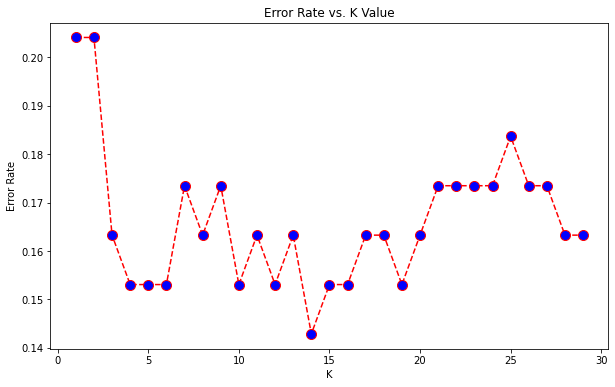

In [ ]:
error_rate = []
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color="red", linestyle="dashed", marker="o",
markerfacecolor="blue", markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel("K")
plt.ylabel("Error Rate")
print("Minimum error rate:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8571428571428571 at K = 13


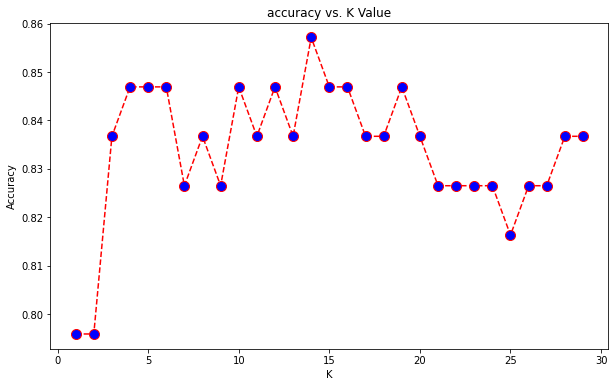

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color = 'red',linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

***8- MLP***

In [ ]:
#MLPClassifier
MLP= MLPClassifier()
param_dict={
    "max_iter" : [200,300,500,1000,2000],
}

grid=GridSearchCV(MLP, param_grid=param_dict, cv=cv, verbose=1)
grid.fit(X_train, y_train)

print("best_params:\n",grid.best_params_,"\n","best_estimator:\n",grid.best_estimator_,"\n","best_score:\n",grid.best_score_)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

best_params:
 {'max_iter': 2000} 
 best_estimator:
 MLPClassifier(max_iter=2000) 
 best_score:
 0.8689608636977058
